In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir="/content/drive/MyDrive/Breast Cancer/"
breast=[]
for file in os.listdir(data_dir):
    breast+=[file]
print(breast)
print(len(breast))

['normal', 'malignant', 'benign']
3


In [ ]:
img_height,img_width=128,128
batch_size=20

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 547 images belonging to 3 classes.
Found 233 images belonging to 3 classes.


In [ ]:
percision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
model.summary()

17225924/17225924 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0 

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy",percision,recall])
hist=model.fit_generator(train_generator,epochs=30,validation_data=test_generator,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
28/28 [==============================] - 440s 15s/step - loss: 1.0724 - accuracy: 0.6380 - precision: 0.5122 - recall: 0.7313 - val_loss: 1.4137 - val_accuracy: 0.6223 - val_precision: 0.5054 - val_recall: 0.7983
Epoch 2/30
28/28 [==============================] - 8s 285ms/step - loss: 0.3093 - accuracy: 0.8958 - precision: 0.6916 - recall: 0.9305 - val_loss: 1.5272 - val_accuracy: 0.6009 - val_precision: 0.4447 - val_recall: 0.8112
Epoch 3/30
28/28 [==============================] - 8s 287ms/step - loss: 0.1784 - accuracy: 0.9452 - precision: 0.7543 - recall: 0.9707 - val_loss: 2.6755 - val_accuracy: 0.5451 - val_precision: 0.3971 - val_recall: 0.6953
Epoch 4/30
28/28 [==============================] - 8s 285ms/step - loss: 0.1199 - accuracy: 0.9689 - precision: 0.7865 - recall: 0.9835 - val_loss: 1.8347 - val_accuracy: 0.6953 - val_precision: 0.5123 - val_recall: 0.8026
Epoch 5/30
28/28 [==============================] - 9s 322ms/step - loss: 0.0800 - accuracy: 0.9762 - pr

In [ ]:
model.evaluate(test_generator)

12/12 [==============================] - 2s 190ms/step - loss: 1.0994 - accuracy: 0.7983 - precision: 0.6969 - recall: 0.8584


[1.0993589162826538, 0.7982832789421082, 0.696864128112793, 0.8583691120147705]

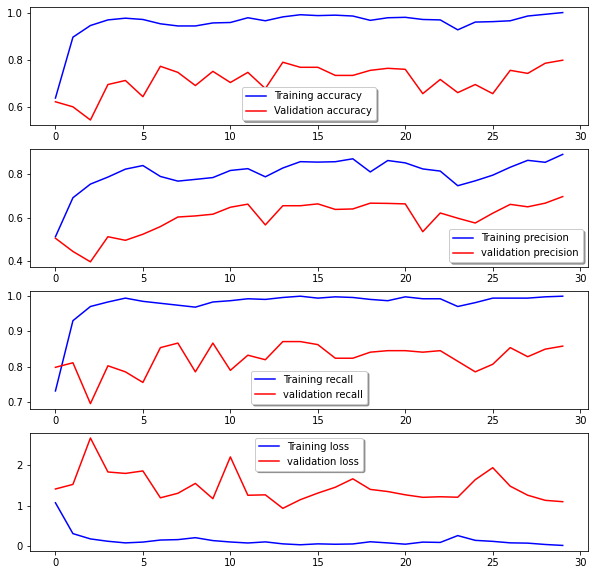

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(10, 10))
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['precision'], color='b', label="Training precision")
ax[1].plot(hist.history['val_precision'], color='r', label="validation precision",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(hist.history['recall'], color='b', label="Training recall")
ax[2].plot(hist.history['val_recall'], color='r', label="validation recall",axes =ax[2])
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(hist.history['loss'], color='b', label="Training loss")
ax[3].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[3])
legend = ax[3].legend(loc='best', shadow=True)

In [ ]:
base_model1 = tf.keras.applications.ResNet50(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model1)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(3, activation='softmax'))
model1.summary()

94765736/94765736 [==============================] - 7s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                       

In [ ]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy",percision,recall])
hist1=model1.fit_generator(train_generator,epochs=30,validation_data=test_generator,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
28/28 [==============================] - 19s 382ms/step - loss: 1.0799 - accuracy: 0.6289 - precision: 0.6702 - recall: 0.6513 - val_loss: 422.3575 - val_accuracy: 0.1674 - val_precision: 0.1674 - val_recall: 0.1674
Epoch 2/30
28/28 [==============================] - 15s 562ms/step - loss: 0.6386 - accuracy: 0.7550 - precision: 0.7853 - recall: 0.7020 - val_loss: 8.9491 - val_accuracy: 0.2704 - val_precision: 0.2704 - val_recall: 0.2704
Epoch 3/30
28/28 [==============================] - 11s 408ms/step - loss: 0.6007 - accuracy: 0.7788 - precision: 0.8116 - recall: 0.7404 - val_loss: 1.4500 - val_accuracy: 0.1674 - val_precision: 0.1674 - val_recall: 0.1674
Epoch 4/30
28/28 [==============================] - 11s 387ms/step - loss: 0.4416 - accuracy: 0.8519 - precision: 0.8688 - recall: 0.8355 - val_loss: 2.0923 - val_accuracy: 0.1674 - val_precision: 0.1674 - val_recall: 0.1674
Epoch 5/30
28/28 [==============================] - 8s 295ms/step - loss: 0.3989 - accuracy: 0.861

In [ ]:
model1.evaluate(test_generator)

12/12 [==============================] - 2s 199ms/step - loss: 3.0054 - accuracy: 0.2961 - precision: 0.3026 - recall: 0.2961


[3.0054337978363037,
 0.29613733291625977,
 0.30263158679008484,
 0.29613733291625977]

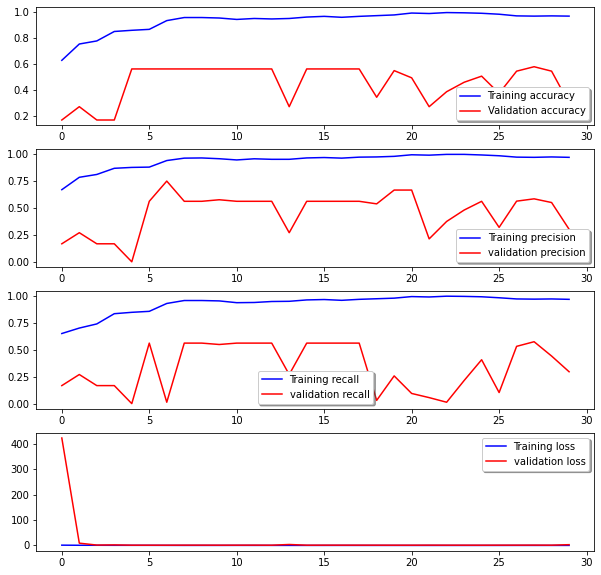

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(10, 10))
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['precision'], color='b', label="Training precision")
ax[1].plot(hist1.history['val_precision'], color='r', label="validation precision",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(hist1.history['recall'], color='b', label="Training recall")
ax[2].plot(hist1.history['val_recall'], color='r', label="validation recall",axes =ax[2])
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(hist1.history['loss'], color='b', label="Training loss")
ax[3].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[3])
legend = ax[3].legend(loc='best', shadow=True)

In [ ]:
base_model2 = tf.keras.applications.DenseNet121(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model2 = Sequential()
model2.add(base_model1)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(3, activation='softmax'))
model2.summary()

29084464/29084464 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                131136    
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                       

In [ ]:
model2.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy",percision,recall])
hist2=model2.fit_generator(train_generator,epochs=30,validation_data=test_generator,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
28/28 [==============================] - 17s 382ms/step - loss: 0.3692 - accuracy: 0.8720 - precision: 0.7118 - recall: 0.6872 - val_loss: 4.4471 - val_accuracy: 0.3476 - val_precision: 0.3364 - val_recall: 0.3176
Epoch 2/30
28/28 [==============================] - 8s 291ms/step - loss: 0.2492 - accuracy: 0.9232 - precision: 0.9298 - recall: 0.9196 - val_loss: 46.0243 - val_accuracy: 0.1674 - val_precision: 0.1674 - val_recall: 0.1674
Epoch 3/30
28/28 [==============================] - 8s 297ms/step - loss: 0.2385 - accuracy: 0.9378 - precision: 0.9424 - recall: 0.9269 - val_loss: 1.3435 - val_accuracy: 0.5021 - val_precision: 0.5163 - val_recall: 0.4764
Epoch 4/30
28/28 [==============================] - 8s 294ms/step - loss: 0.1823 - accuracy: 0.9488 - precision: 0.9539 - recall: 0.9452 - val_loss: 2.4782 - val_accuracy: 0.4678 - val_precision: 0.4587 - val_recall: 0.4292
Epoch 5/30
28/28 [==============================] - 8s 297ms/step - loss: 0.4353 - accuracy: 0.8592 - 

In [ ]:
model2.evaluate(test_generator)

12/12 [==============================] - 2s 200ms/step - loss: 1.3436 - accuracy: 0.7167 - precision: 0.7167 - recall: 0.7167


[1.343644142150879, 0.716738224029541, 0.716738224029541, 0.716738224029541]

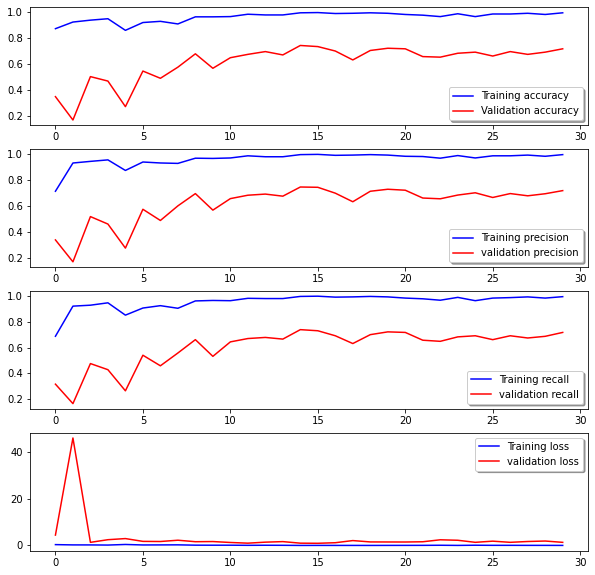

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(10, 10))
ax[0].plot(hist2.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist2.history['precision'], color='b', label="Training precision")
ax[1].plot(hist2.history['val_precision'], color='r', label="validation precision",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

ax[2].plot(hist2.history['recall'], color='b', label="Training recall")
ax[2].plot(hist2.history['val_recall'], color='r', label="validation recall",axes =ax[2])
legend = ax[2].legend(loc='best', shadow=True)

ax[3].plot(hist2.history['loss'], color='b', label="Training loss")
ax[3].plot(hist2.history['val_loss'], color='r', label="validation loss",axes =ax[3])
legend = ax[3].legend(loc='best', shadow=True)


1/1 [==============================] - 1s 1s/step
[0.04101831 0.9895599  0.15433657]


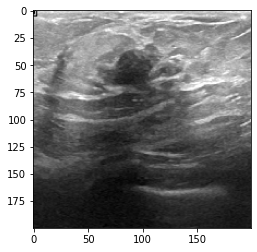

Prediction: malignant


In [ ]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'/content/drive/MyDrive/Breast Cancer/malignant/malignant (100).png', grayscale=False, target_size=(128,128))
show_img=image.load_img(r'/content/drive/MyDrive/Breast Cancer/malignant/malignant (100).png', grayscale=False, target_size=(200, 200))
breast = breast
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',breast[ind])